<a href="https://colab.research.google.com/github/jasaleha/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias de nivel secundario en Argentina
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía",
    "Arte", "Música", "Educación Ciudadana"
]

# Generar datos aleatorios para 100 estudiantes
num_filas = 100
data = []
for _ in range(num_filas):
  apellido = 'Apellido' + str(random.randint(1, 100))  # Apellido aleatorio
  nombre = 'Nombre' + str(random.randint(1, 100))     # Nombre aleatorio
  dni = random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota1 = random.randint(1, 10)
  nota2 = random.randint(1, 10)
  nota3 = random.randint(1, 10)
  faltas = random.randint(0, 20)
  data.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])

# Crear el DataFrame
df = pd.DataFrame(data, columns=['Apellido', 'Nombre', 'Nro_DNI', 'Materia Escolar', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Mostrar el DataFrame
df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Apellido82,Nombre97,30472566,Música,8,1,5,6
1,Apellido85,Nombre50,55200340,Lengua y Literatura,1,3,2,0
2,Apellido50,Nombre39,56873917,Educación Ciudadana,6,7,7,11
3,Apellido22,Nombre28,54676661,Filosofía,2,8,3,18
4,Apellido23,Nombre62,22326356,Lengua y Literatura,3,10,1,15
...,...,...,...,...,...,...,...,...
95,Apellido7,Nombre95,53861016,Lengua y Literatura,4,7,9,12
96,Apellido30,Nombre51,60159255,Arte,3,4,6,18
97,Apellido47,Nombre27,67091098,Geografía,3,8,7,7
98,Apellido31,Nombre24,44963540,Biología,2,7,6,16


AttributeError: 'BarContainer' object has no attribute 'get_legend_handles_labels'

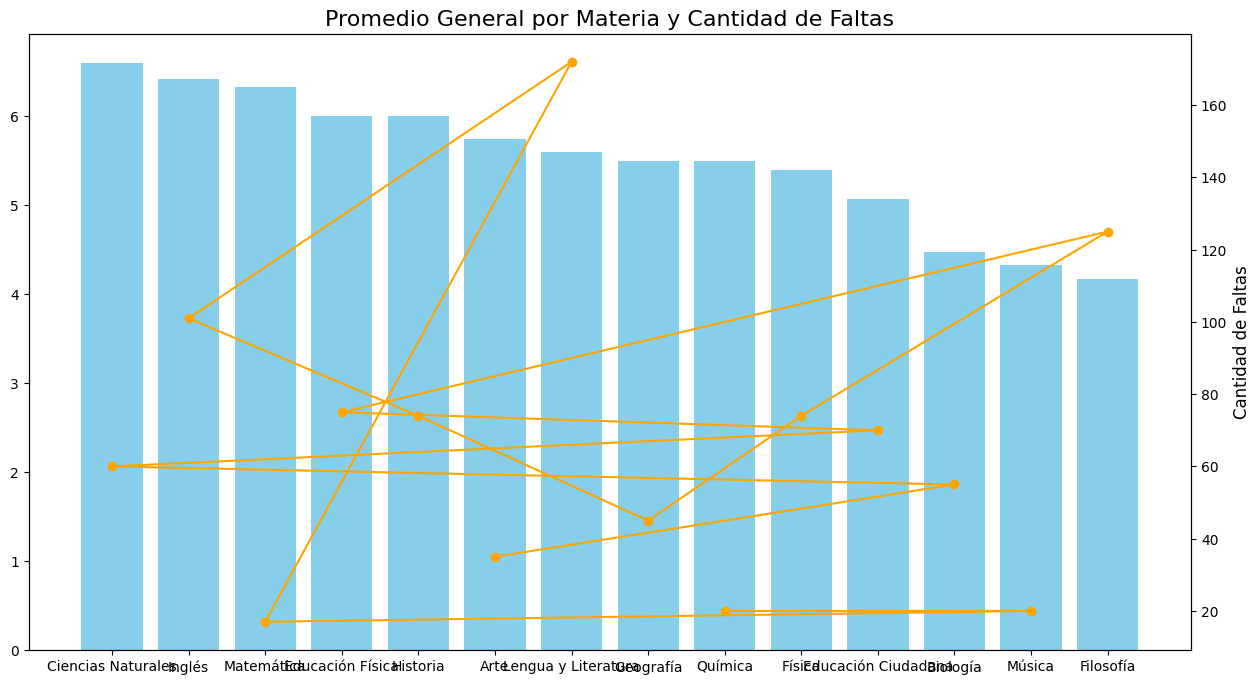

In [3]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor contrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio de cada materia
promedios_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar los promedios de mayor a menor
promedios_ordenados = promedios_materias.sort_values(ascending=False)

# Calcular la cantidad de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))  # Ajustar el tamaño de la figura

# Barras para el promedio
ax1 = plt.bar(promedios_ordenados.index, promedios_ordenados.values, color='skyblue', label='Promedio General')

# Eje secundario para las faltas
ax2 = plt.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, marker='o', linestyle='-', color='orange', label='Faltas Totales')

# Etiquetas y título
plt.title('Promedio General por Materia y Cantidad de Faltas', fontsize=16)
plt.xlabel('Materia', fontsize=12)
plt.ylabel('Promedio', fontsize=12)
ax2.set_ylabel('Cantidad de Faltas', fontsize=12)


# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines + lines2, labels + labels2, loc='upper right')

# Ajustar el espaciado entre las etiquetas del eje x
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [4]:
df.to_csv("datos_alumnos.csv", index=False)